In [1]:
import pandas as pd

In [104]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PATH = r"../data/Student_Performance.csv"
dataset = pd.read_csv(PATH)

# Understanding the Data

In [5]:
dataset.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [52]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [53]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [54]:
dataset.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# Data Pre processing


In [56]:
dataset.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [57]:
num = dataset.drop(['Extracurricular Activities'], axis=1)
num.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler().set_output(transform='pandas')
num_scaled = scaler.fit_transform(num)

In [60]:
num_scaled.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0.866505,0.145333,0.560870


# Categorical data preprocessing

In [61]:
cat = dataset[['Extracurricular Activities']]

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
cat_scaled = encoder.fit_transform(cat)

In [64]:
cat_scaled.head()

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


# Concatinating Numerical and Categorical Data

In [65]:
dataset2 = pd.concat([num_scaled, cat_scaled], axis=1)
dataset2.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,1.862167,0.0,1.0
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818,1.0,0.0
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220,0.0,1.0
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687,0.0,1.0
4,0.775188,0.320275,0.866505,0.145333,0.560870,1.0,0.0


<ipython-input-88-8a06f06857ff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2['Performance Index'])


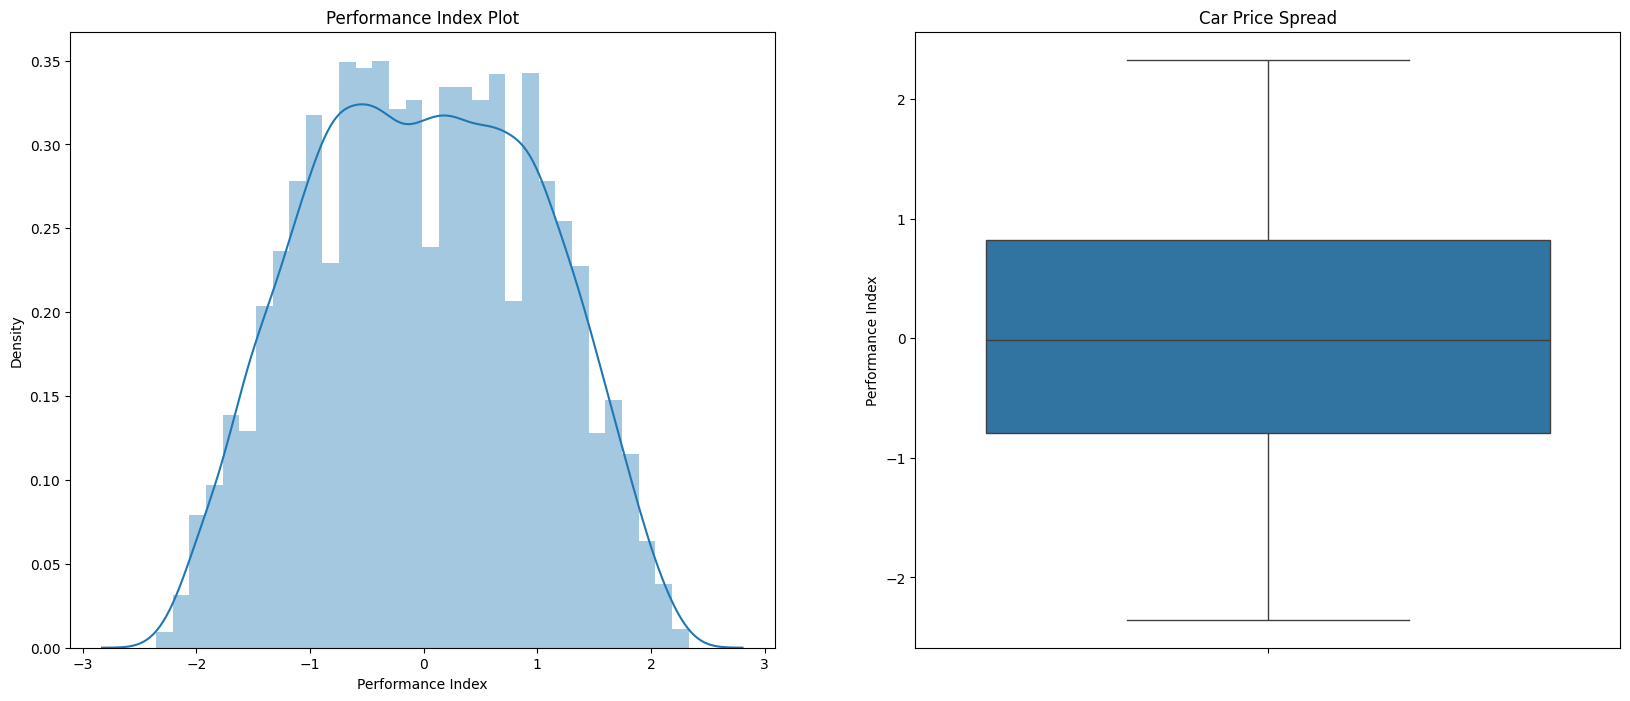

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Performance Index Plot')
sns.distplot(dataset2['Performance Index'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(dataset2['Performance Index'])

plt.show()

In [74]:
X = dataset2[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']]

In [75]:
y = dataset2['Performance Index']

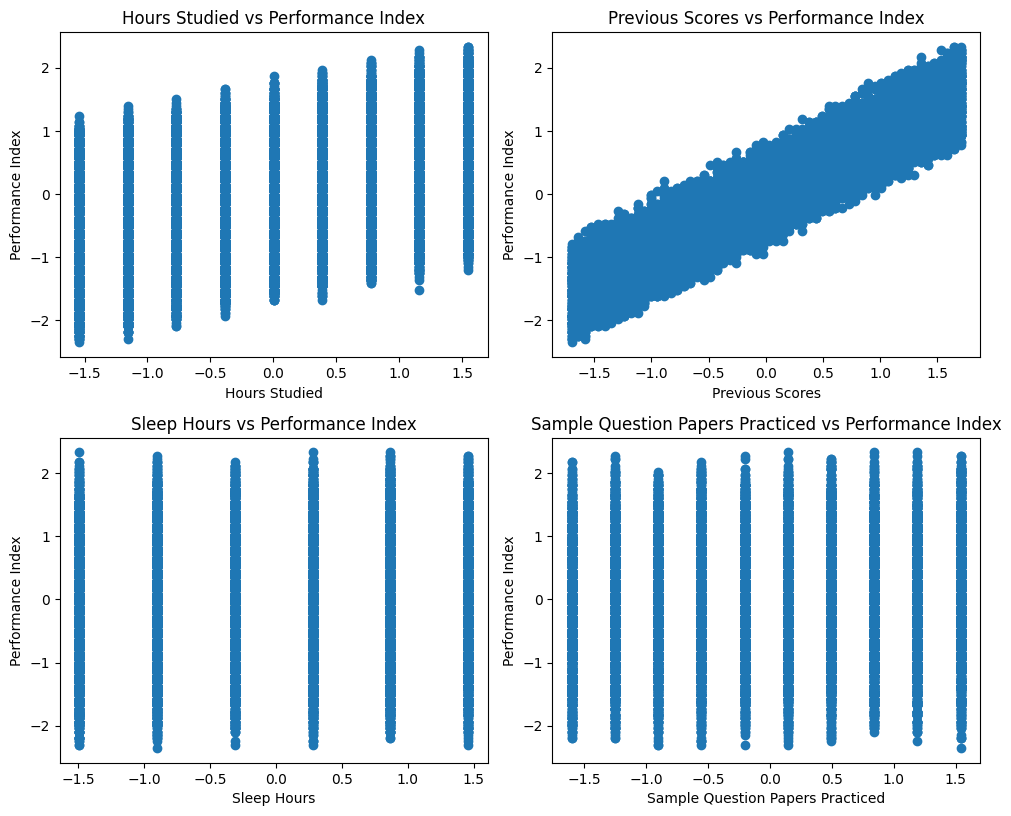

In [90]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(X[x],y)
    plt.title(x+' vs Performance Index')
    plt.ylabel('Performance Index')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Hours Studied', 1)
scatter('Previous Scores', 2)
scatter('Sleep Hours', 3)
scatter('Sample Question Papers Practiced', 4)

plt.tight_layout()

# Data Splitting

In [81]:
from sklearn.model_selection import train_test_split

X_train, x1, y_train, x2 = train_test_split(X, y, test_size=0.2)
X_valid, X_test, y_valid, y_test = train_test_split(x1, x2, test_size=0.25)

In [82]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(8000, 6)
(1500, 6)
(500, 6)
(8000,)
(1500,)
(500,)


# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [96]:
print(f'Training Mean Squared Error: {mse_train}')
print(f'Testing Mean Squared Error: {mse_test}')
print(f'Training R-squared: {r2_train}')
print(f'Testing R-squared: {r2_test}')

Training Mean Squared Error: 0.011313279896213663
Testing Mean Squared Error: 0.012339785454698686
Training R-squared: 0.9886771025449246
Testing R-squared: 0.9876600290218607


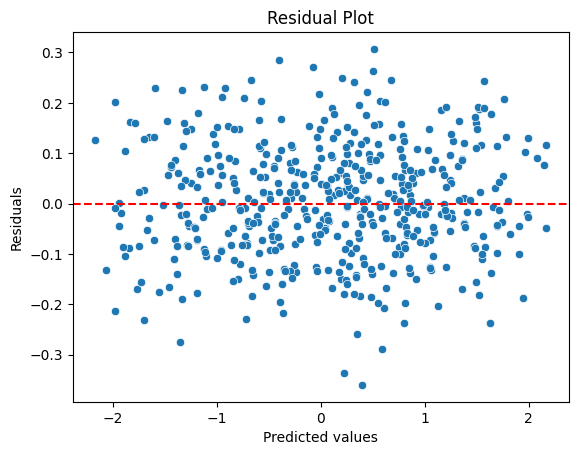

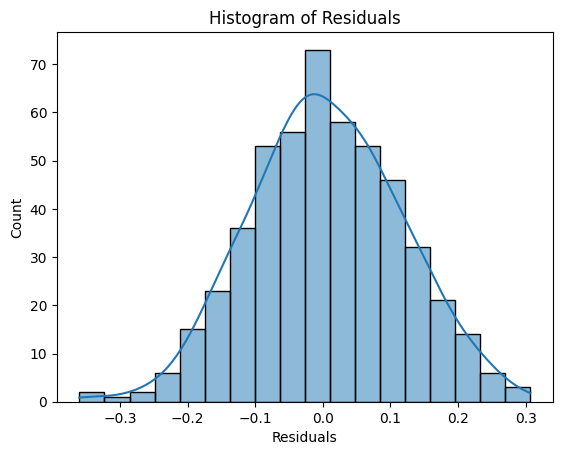

In [97]:
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Quantile Regression Models

In [98]:
import statsmodels.api as sm


quantiles = [0.25, 0.5, 0.75]


models = {}
for quantile in quantiles:
    model = sm.QuantReg(y_train, X_train).fit(q=quantile)
    models[quantile] = model

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f'Quantile {quantile} - Training Mean Squared Error: {mse_train}')
    print(f'Quantile {quantile} - Testing Mean Squared Error: {mse_test}')


Quantile 0.25 - Training Mean Squared Error: 0.01642020050280117
Quantile 0.25 - Testing Mean Squared Error: 0.01806830780075373
Quantile 0.5 - Training Mean Squared Error: 0.011318338729604577
Quantile 0.5 - Testing Mean Squared Error: 0.012352043647055996
Quantile 0.75 - Training Mean Squared Error: 0.0162151990473928
Quantile 0.75 - Testing Mean Squared Error: 0.016628480423824775


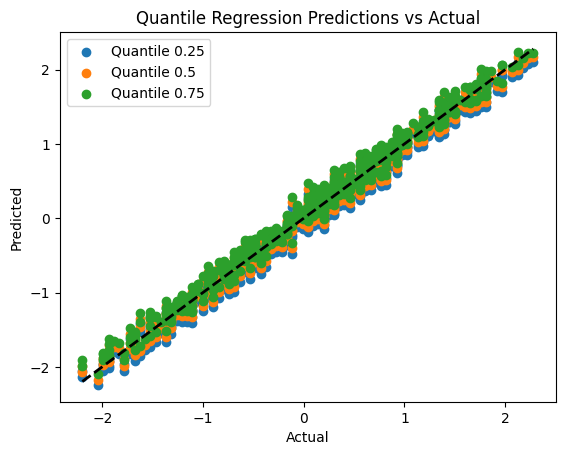

In [107]:
import matplotlib.pyplot as plt

for quantile in quantiles:
    y_pred_test = models[quantile].predict(X_test)
    plt.scatter(y_test, y_pred_test, label=f'Quantile {quantile}')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Quantile Regression Predictions vs Actual')
plt.show()


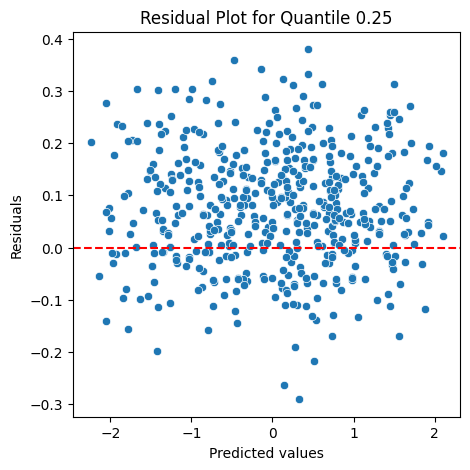

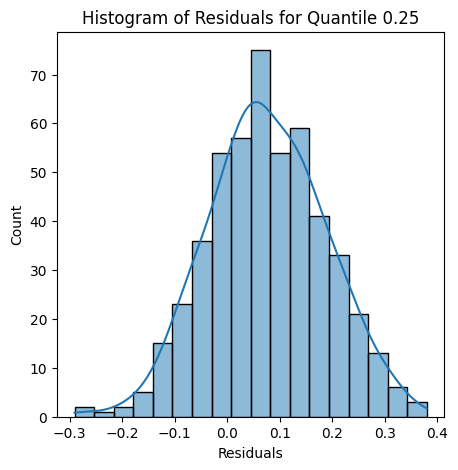

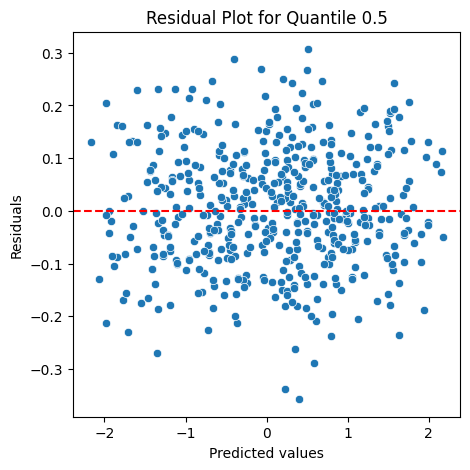

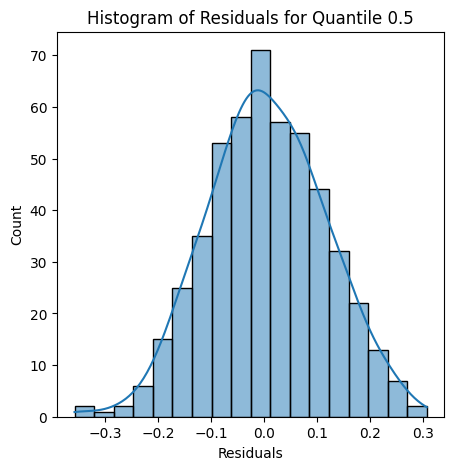

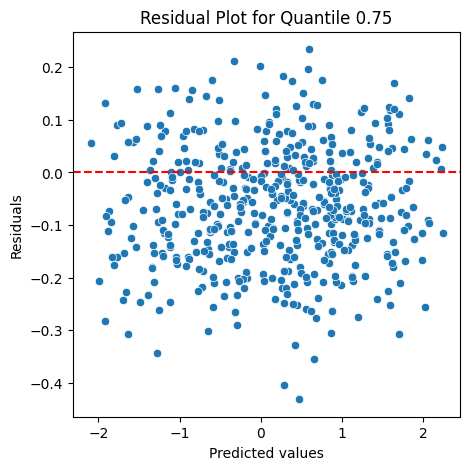

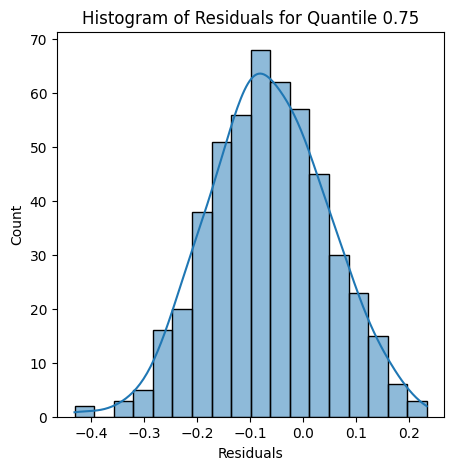

In [102]:
for quantile in quantiles:
    y_pred_test = models[quantile].predict(X_test)
    residuals = y_test - y_pred_test

    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_pred_test, y=residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for Quantile {quantile}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    plt.figure(figsize=(5, 5))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Histogram of Residuals for Quantile {quantile}')
    plt.show()